#1. 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd       # pandas library 불러내기
import numpy as np        # numpy library 불러내기

pd.set_option('display.max_columns', None)   # 결과물로 보여주는 열 갯수 최대화
pd.set_option('display.max_rows', None)      # 결과물로 보여주는 행 갯수 최대화

df = pd.read_csv('/content/drive/MyDrive/complete(in).csv')
                                             # 데이터파일을 불러와서 데이터프레임(df)에 저장
df.shape

<ipython-input-5-3f7bd7b24c22>:7: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/complete(in).csv')


(88875, 11)

In [ ]:
import pandas as pd

# CSV 파일을 'duration (seconds)' 열을 문자열로 읽어옴
file_path = '/content/drive/MyDrive/complete(in).csv'
df = pd.read_csv(file_path, dtype={'duration (seconds)': 'str'}, low_memory=False)
#duration에 대한 값이 숫자가 아닌 열이 있어, NaN으로 변환 후 제거
# 'duration (seconds)' 열을 숫자로 변환하고, 비숫자 값은 NaN으로 설정
df['duration (seconds)'] = pd.to_numeric(df['duration (seconds)'], errors='coerce')

# 'duration (seconds)' 열에 NaN 값이 있는 행을 제거
df = df.dropna(subset=['duration (seconds)'])

# 데이터프레임의 첫 몇 행을 출력하여 확인
print(df.head())


           datetime                  city state country     shape  \
0  10/10/1949 20:30            san marcos    tx      us  cylinder   
1  10/10/1949 21:00          lackland afb    tx     NaN     light   
2  10/10/1955 17:00  chester (uk/england)   NaN      gb    circle   
3  10/10/1956 21:00                  edna    tx      us    circle   
4  10/10/1960 20:00               kaneohe    hi      us     light   

   duration (seconds) duration (hours/min)  \
0              2700.0           45 minutes   
1              7200.0              1-2 hrs   
2                20.0           20 seconds   
3                20.0             1/2 hour   
4               900.0           15 minutes   

                                            comments date posted    latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.8830556   
1  1949 Lackland AFB, TX.  Lights racing across t...  12/16/2005    29.38421   
2   Green/Orange circular disc over Chester, England   1/21/2008    

#1-2. id 변수 설정과 타깃 변수 설정

In [ ]:
# ID 변수 설정 (체크)
df['ID'] = range(1, len(df) + 1)

# 타깃 변수 설정 (체크)
target = 'duration (seconds)'

print(df.head())

           datetime                  city state country     shape  \
0  10/10/1949 20:30            san marcos    tx      us  cylinder   
1  10/10/1949 21:00          lackland afb    tx     NaN     light   
2  10/10/1955 17:00  chester (uk/england)   NaN      gb    circle   
3  10/10/1956 21:00                  edna    tx      us    circle   
4  10/10/1960 20:00               kaneohe    hi      us     light   

   duration (seconds) duration (hours/min)  \
0              2700.0           45 minutes   
1              7200.0              1-2 hrs   
2                20.0           20 seconds   
3                20.0             1/2 hour   
4               900.0           15 minutes   

                                            comments date posted    latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.8830556   
1  1949 Lackland AFB, TX.  Lights racing across t...  12/16/2005    29.38421   
2   Green/Orange circular disc over Chester, England   1/21/2008    

In [ ]:
# ID 변수와 타깃 변수 확인
print(df[['ID', 'duration (seconds)']].head())
print(f"ID 변수의 데이터 타입: {df['ID'].dtype}")
print(f"타깃 변수의 데이터 타입: {df['duration (seconds)'].dtype}")

   ID  duration (seconds)
0   1              2700.0
1   2              7200.0
2   3                20.0
3   4                20.0
4   5               900.0
ID 변수의 데이터 타입: int64
타깃 변수의 데이터 타입: float64


#1.3 결측값 처리

In [ ]:
# 각 열의 결측값 비율을 계산
missing_data = df.isnull().mean()

# 결측값 비율이 50% 이상인 열을 제거
df = df.loc[:, missing_data < 0.5]

# 남은 결측값 처리
df.replace('.', pd.NA, inplace=True)

# 'duration (hours/min)' 열 제거
df = df.drop(columns=['duration (hours/min)'])

print(df.head())


           datetime                  city state country     shape  \
0  10/10/1949 20:30            san marcos    tx      us  cylinder   
1  10/10/1949 21:00          lackland afb    tx     NaN     light   
2  10/10/1955 17:00  chester (uk/england)   NaN      gb    circle   
3  10/10/1956 21:00                  edna    tx      us    circle   
4  10/10/1960 20:00               kaneohe    hi      us     light   

   duration (seconds)                                           comments  \
0              2700.0  This event took place in early fall around 194...   
1              7200.0  1949 Lackland AFB, TX.  Lights racing across t...   
2                20.0   Green/Orange circular disc over Chester, England   
3                20.0  My older brother and twin sister were leaving ...   
4               900.0  AS a Marine 1st Lt. flying an FJ4B fighter/att...   

  date posted    latitude   longitude  ID  
0   4/27/2004  29.8830556  -97.941111   1  
1  12/16/2005    29.38421  -98.581082   

#1.4 요약 통계 및 도수분포표

In [ ]:
# 요약 통계
print(df.describe())

       duration (seconds)     longitude            ID
count        8.887000e+04  88870.000000  88870.000000
mean         8.373412e+03    -84.834641  44435.500000
std          5.905046e+05     41.567593  25654.703549
min          0.000000e+00   -176.658056      1.000000
25%          1.500000e+01   -112.046944  22218.250000
50%          1.200000e+02    -87.650000  44435.500000
75%          6.000000e+02    -77.615833  66652.750000
max          9.783600e+07    178.441900  88870.000000


In [ ]:
# 변수 'duration (seconds)'에 대한 요약통계
print(df['duration (seconds)'].describe())

count    8.887000e+04
mean     8.373412e+03
std      5.905046e+05
min      0.000000e+00
25%      1.500000e+01
50%      1.200000e+02
75%      6.000000e+02
max      9.783600e+07
Name: duration (seconds), dtype: float64


In [ ]:
# 도수분포표 출력 (범주형 변수에 대해 상위 10개 값만)
for col in df.select_dtypes(include=['object']).columns:
    print(f'{col} 변수의 도수분포표:')
    print(df[col].value_counts().head(10))

datetime 변수의 도수분포표:
datetime
7/4/2010 22:00      36
7/4/2012 22:00      33
11/16/1999 19:00    28
7/4/2011 22:00      26
10/31/2004 20:00    26
9/19/2009 20:00     26
7/4/2010 21:00      24
7/4/2013 22:00      22
7/4/2012 22:30      22
11/16/1999 19:05    22
Name: count, dtype: int64
city 변수의 도수분포표:
city
seattle        570
phoenix        488
portland       399
las vegas      395
los angeles    375
san diego      361
houston        317
chicago        295
tucson         258
miami          258
Name: count, dtype: int64
state 변수의 도수분포표:
state
ca    10449
wa     4653
fl     4598
tx     4050
ny     3511
az     2939
il     2874
pa     2783
oh     2642
mi     2254
Name: count, dtype: int64
country 변수의 도수분포표:
country
us    70290
ca     3266
gb     2050
au      593
de      112
Name: count, dtype: int64
shape 변수의 도수분포표:
shape
light        17872
triangle      8489
circle        8452
fireball      6562
unknown       6319
other         6247
disk          6005
sphere        5755
oval          4119
fo

In [ ]:
# IQR 방법을 사용한 이상값 제거
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1

# IQR 범위를 벗어나는 이상값 제거
df = df[~((df[target] < (Q1 - 1.5 * IQR)) | (df[target] > (Q3 + 1.5 * IQR)))]

# 이상값 제거 후 데이터프레임의 첫 몇 행을 출력하여 확인합니다.
print(df.head())


           datetime                  city state country   shape  \
2  10/10/1955 17:00  chester (uk/england)   NaN      gb  circle   
3  10/10/1956 21:00                  edna    tx      us  circle   
4  10/10/1960 20:00               kaneohe    hi      us   light   
5  10/10/1961 19:00               bristol    tn      us  sphere   
6  10/10/1965 21:00    penarth (uk/wales)   NaN      gb  circle   

   duration (seconds) duration (hours/min)  \
2                20.0           20 seconds   
3                20.0             1/2 hour   
4               900.0           15 minutes   
5               300.0            5 minutes   
6               180.0         about 3 mins   

                                            comments date posted    latitude  \
2   Green/Orange circular disc over Chester, England   1/21/2008        53.2   
3  My older brother and twin sister were leaving ...   1/17/2004  28.9783333   
4  AS a Marine 1st Lt. flying an FJ4B fighter/att...   1/22/2004  21.4180556   


In [ ]:
df['shape'] = df['shape'].fillna('unknown')

In [ ]:
# 'shape' 열에 대해 원-핫 인코딩 수행
df = pd.get_dummies(df, columns=['shape'], drop_first=True)


In [ ]:
# 원-핫 인코딩된 후의 데이터프레임 열 확인
print("Columns after one-hot encoding:", df.columns)

# shape 관련 열을 확인
shape_columns = [col for col in df.columns if 'shape_' in col]
print("Shape columns:", shape_columns)

Columns after one-hot encoding: Index(['city', 'state', 'country', 'duration (seconds)', 'longitude', 'ID',
       'shape_chevron', 'shape_cigar', 'shape_circle', 'shape_cone',
       'shape_crescent', 'shape_cross', 'shape_cylinder', 'shape_delta',
       'shape_diamond', 'shape_disk', 'shape_dome', 'shape_egg',
       'shape_fireball', 'shape_flare', 'shape_flash', 'shape_formation',
       'shape_hexagon', 'shape_light', 'shape_other', 'shape_oval',
       'shape_pyramid', 'shape_rectangle', 'shape_round', 'shape_sphere',
       'shape_teardrop', 'shape_triangle', 'shape_unknown',
       'duration_category'],
      dtype='object')
Shape columns: ['shape_chevron', 'shape_cigar', 'shape_circle', 'shape_cone', 'shape_crescent', 'shape_cross', 'shape_cylinder', 'shape_delta', 'shape_diamond', 'shape_disk', 'shape_dome', 'shape_egg', 'shape_fireball', 'shape_flare', 'shape_flash', 'shape_formation', 'shape_hexagon', 'shape_light', 'shape_other', 'shape_oval', 'shape_pyramid', 'shape_rect

In [ ]:
# 각 shape 열의 빈도수 확인
shape_counts = df[[col for col in df.columns if col.startswith('shape_')]].sum()
print(shape_counts)

shape_chevron        941
shape_cigar         2034
shape_circle        7409
shape_cone           296
shape_crescent         1
shape_cross          231
shape_cylinder      1252
shape_delta            7
shape_diamond       1094
shape_disk          5266
shape_dome             1
shape_egg            759
shape_fireball      6199
shape_flare            1
shape_flash         1310
shape_formation     2376
shape_hexagon          1
shape_light        15244
shape_other         5437
shape_oval          3648
shape_pyramid          1
shape_rectangle     1293
shape_round            2
shape_sphere        5091
shape_teardrop       742
shape_triangle      7687
shape_unknown       8217
dtype: int64


In [ ]:
from scipy.stats import ttest_ind

group1 = df[df['shape_circle'] == 1]['duration (seconds)']
group2 = df[df['shape_light'] == 1]['duration (seconds)']
t_stat, p_val = ttest_ind(group1, group2, nan_policy='omit')
print('t-검정 통계량:', t_stat)
print('p-값:', p_val)

t-검정 통계량: -1.8010815616678875
p-값: 0.0717033204992346


In [ ]:
if 'shape_circle' in df.columns and 'shape_light' in df.columns:
    group1 = df[df['shape_circle'] == 1]['duration (seconds)']
    group2 = df[df['shape_light'] == 1]['duration (seconds)']
    t_stat, p_val = ttest_ind(group1, group2, nan_policy='omit')
    # t-검정 결과를 표 형태로 정리
    ttest_results = pd.DataFrame({
        'Group': ['Circle', 'Light'],
        'Count': [len(group1), len(group2)],
        'Mean': [group1.mean(), group2.mean()],
        'Std': [group1.std(), group2.std()],
        't-Statistic': [t_stat, t_stat],
        'p-Value': [p_val, p_val]
    })
    print(ttest_results)
else:
    print("필요한 shape 열이 데이터프레임에 없습니다.")


    Group  Count        Mean         Std  t-Statistic   p-Value
0  Circle   7409  245.626576  321.827026    -1.801082  0.071703
1   Light  15244  253.973119  329.808936    -1.801082  0.071703


#1.5 시각화


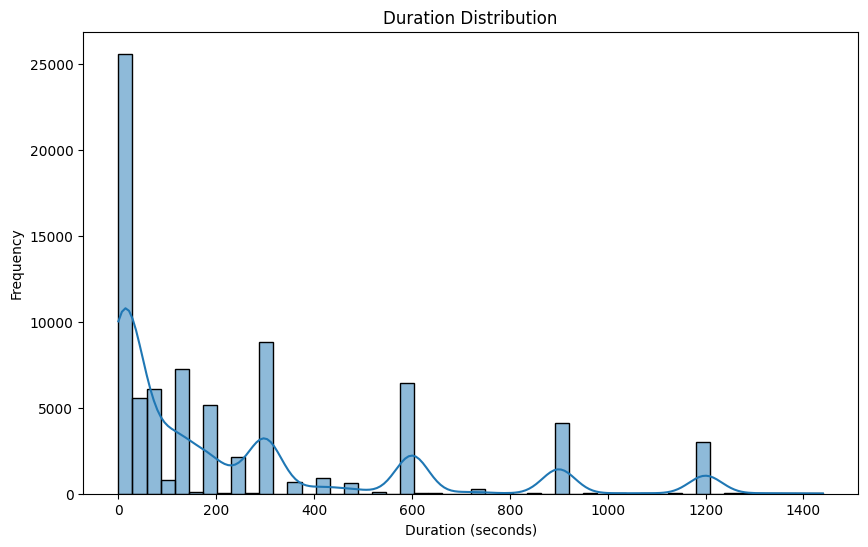

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(df[target], bins=50, kde=True)
plt.title('Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


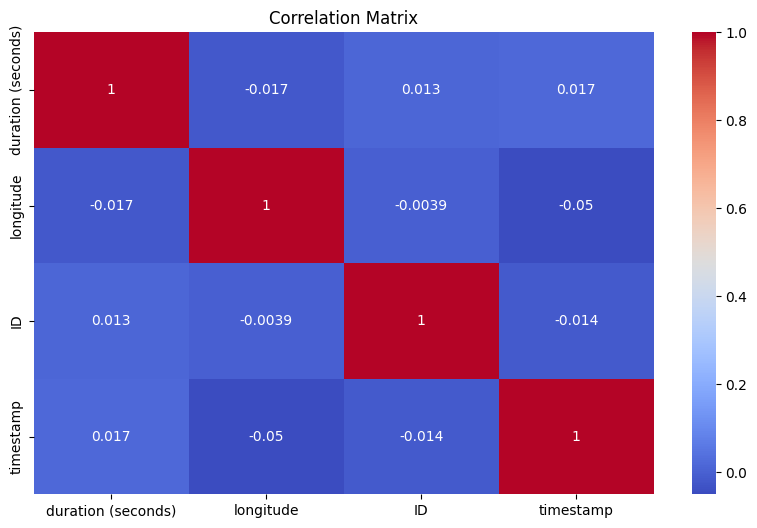

In [ ]:
# 상관계수 히트맵
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

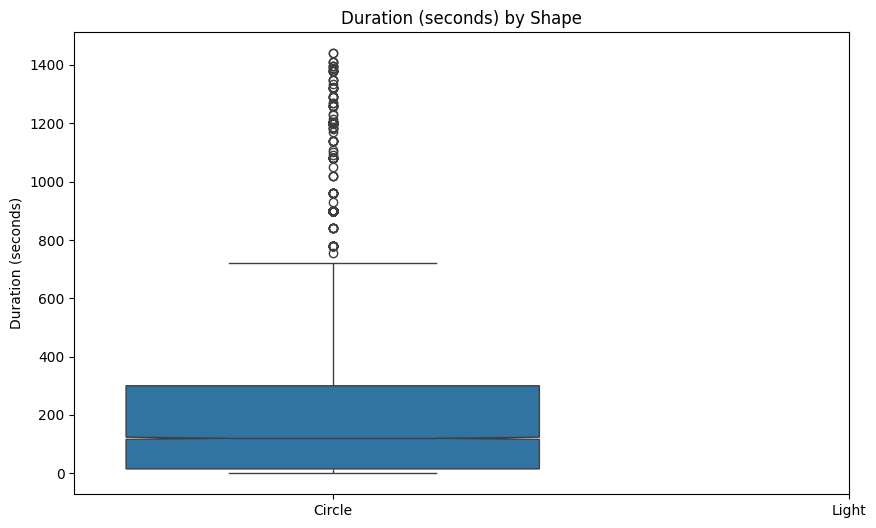

In [ ]:
# 'shape_circle'와 'shape_light'가 존재하는지 확인
if 'shape_circle' in df.columns and 'shape_light' in df.columns:
    group1 = df[df['shape_circle'] == 1]['duration (seconds)']
    group2 = df[df['shape_light'] == 1]['duration (seconds)']

    # 상자 그림 (Box Plot) 시각화
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=[group1, group2], notch=True)
    plt.xticks([0, 1], ['Circle', 'Light'])
    plt.title('Duration (seconds) by Shape')
    plt.ylabel('Duration (seconds)')
    plt.show()
else:
    print("필요한 shape 열이 데이터프레임에 없습니다.")

상자 (Box): 데이터의 중간 50%를 나타내며, 상자의 위쪽 경계는 3사분위수(Q3), 아래쪽 경계는 1사분위수(Q1)
중앙값 (Median): 상자 내부의 가로선으로, 데이터의 중앙값을 나타냄
수염 (Whiskers): 데이터의 범위를 나타내며, 일반적으로 수염의 끝은 Q1 - 1.5IQR 및 Q3 + 1.5IQR

여기서 IQR(Interquartile Range)는 Q3 - Q1

이상값 (Outliers): 수염 밖에 있는 데이터 점들로, 일반적인 데이터 범위에서 벗어난 값들
이 그림에서 볼 수 있는 것:
Circle 그룹은 Light 그룹보다 평균적으로 더 긴 지속시간을 가지는 경향이 있음
Circle 그룹에는 몇 가지 이상값이 있음
Light 그룹의 데이터는 상대적으로 더 짧은 지속시간을 가지며, 이상값이 적음

In [ ]:
# 'datetime' 열을 datetime 형식으로 변환
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# 'datetime' 열을 유닉스 타임스탬프로 변환
df['timestamp'] = df['datetime'].astype(np.int64) // 10**9

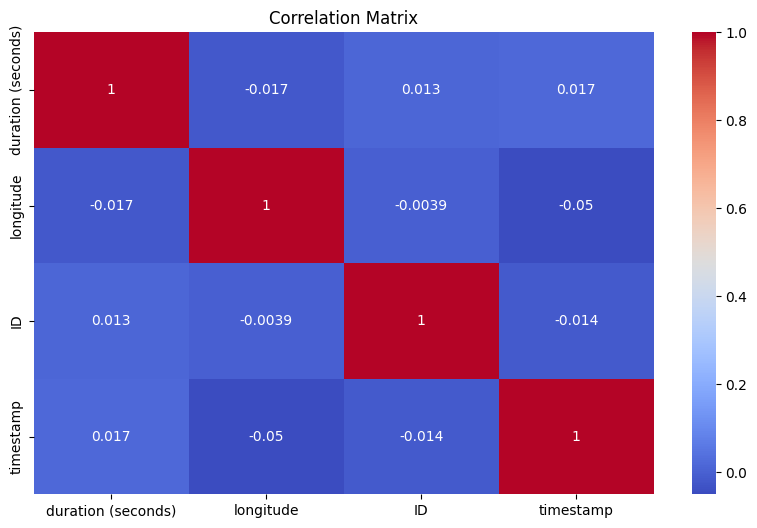

In [ ]:
# 숫자형 열만 선택하여 상관계수 행렬 계산
numeric_df = df.select_dtypes(include=[np.number])

# 상관계수 히트맵
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

duration (seconds)와 timestamp 간의 상관계수가 0.017로 나타나, 시간의 흐름에 따라 UFO 목격 지속시간에 변화가 거의 없음을 의미
longitude와 timestamp 간의 상관계수는 -0.05로 약한 음의 상관관계가 있음
이는 시간이 지남에 따라 경도가 약간 감소하는 경향이 있을 수 있음을 나타냄

#1.6 데이터 추가처리

In [ ]:
# 불필요한 열 제거
df = df.drop(columns=['datetime'])

In [ ]:
# 불필요한 열 제거
df = df.drop(columns=['comments'])

In [ ]:
# 불필요한 열 제거
df = df.drop(columns=[ 'date posted'])

In [ ]:
# 모든 범주형 변수에 대해 원-핫 인코딩 수행
#df = pd.get_dummies(df, columns=[ 'city', 'state', 'country'], drop_first=True)

In [ ]:
df1=df.copy()
# 이진 분류를 위해 타깃 변수를 변환 (df1에 저장)
c1 = df1['duration (seconds)'] >= 120
c0 = df1['duration (seconds)'] < 120
df1.loc[c1, "duration_B"] = 1
df1.loc[c0, "duration_B"] = 0

X = df1.drop(['duration_B'], axis=1)   # 타겟변수를 제외한 입력변수를 data에 저장
y = df1['duration_B']


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

# 숫자형 데이터만 선택
X = X.select_dtypes(include=[np.number])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# 데이터 스케일링 (datetime 열 제거 후)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)


In [ ]:
# 50:50 data partition.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42)   # test_size=0.5임에 주의

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (39092, 3)
X_test shape: (39093, 3)


#1.7 모델

In [ ]:
pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SMOTE를 사용하여 오버샘플링 수행
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

# 숫자형 데이터만 선택
X = X.select_dtypes(include=[np.number])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5108587215102448
Classification Report:
               precision    recall  f1-score   support

         0.0       0.49      0.04      0.07     19083
         1.0       0.51      0.96      0.67     20010

    accuracy                           0.51     39093
   macro avg       0.50      0.50      0.37     39093
weighted avg       0.50      0.51      0.38     39093



비표준화모델

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습 (비표준화 모델)
model_non_standardized = LogisticRegression(max_iter=200)
model_non_standardized.fit(X_train, y_train)

# 예측
y_pred_non_standardized = model_non_standardized.predict(X_test)

# 성능 평가
print("비표준화 모델 성능")
print("Accuracy:", accuracy_score(y_test, y_pred_non_standardized))
print("Classification Report:\n", classification_report(y_test, y_pred_non_standardized))


비표준화 모델 성능
Accuracy: 0.956321545053399
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.93      0.95      7575
         1.0       0.94      0.98      0.96      8062

    accuracy                           0.96     15637
   macro avg       0.96      0.96      0.96     15637
weighted avg       0.96      0.96      0.96     15637



기본모델(표준화)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습 (기본 모델)
model_basic = LogisticRegression(max_iter=200)
model_basic.fit(X_train, y_train)

# 예측
y_pred_basic = model_basic.predict(X_test)

# 성능 평가
print("기본 모델 성능")
print("Accuracy:", accuracy_score(y_test, y_pred_basic))
print("Classification Report:\n", classification_report(y_test, y_pred_basic))


기본 모델 성능
Accuracy: 0.956321545053399
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.93      0.95      7575
         1.0       0.94      0.98      0.96      8062

    accuracy                           0.96     15637
   macro avg       0.96      0.96      0.96     15637
weighted avg       0.96      0.96      0.96     15637



Accuracy (정확도): 전체 예측 중 맞춘 비율로, 0.38 (약 38%)입니다. 이는 세 개의 범주 중 short 범주만 주로 맞추고 있어 정확도가 낮음을 의미합니다.

Precision (정밀도): 특정 클래스로 예측한 샘플 중 실제로 그 클래스에 속하는 샘플의 비율입니다. long과 medium 범주는 정밀도가 0으로, 예측된 샘플이 없음을 나타냅니다. short 범주만 정밀도가 존재합니다.

Recall (재현율): 실제로 특정 클래스에 속하는 샘플 중에서 모델이 그 클래스로 올바르게 예측한 샘플의 비율입니다. short 범주는 재현율이 1.0으로, 실제 short 클래스 샘플을 모두 맞췄음을 나타냅니다. long과 medium 범주는 재현율이 0으로, 이 범주를 전혀 예측하지 못함을 의미합니다.

F1-Score: 정밀도와 재현율의 조화 평균으로, 모델의 전체적인 성능을 나타냅니다. short 범주만 유의미한 F1-Score를 가지고 있습니다.

Support: 각 범주에 속하는 실제 샘플의 수입니다. short 범주가 4410, medium 범주가 3434, long 범주가 3884입니다.

macro avg (Macro Average)
정밀도 (Precision), 재현율 (Recall), F1-Score의 macro avg는 모든 클래스에 대해 단순 평균을 계산한 값입니다.
각 클래스의 성능 지표를 동일하게 취급하여 평균을 내므로, 클래스 불균형이 있는 경우 이를 반영하지 못할 수 있습니다.클래스 간의 균형을 강조할 때 유용합니다.

weighted avg (Weighted Average)
정밀도 (Precision), 재현율 (Recall), F1-Score의 weighted avg는 각 클래스의 샘플 수를 가중치로 하여 평균을 계산한 값입니다.

클래스 불균형을 반영하므로, 데이터셋에서 클래스가 많을수록 그 클래스의 성능이 더 많이 반영됩니다.
전체 데이터셋에 대한 모델 성능을 더 잘 나타냅니다.


In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 결정 트리 분류모델과 그리드 서치 설정
param_grid = {'max_depth': [3, 5, 7, 10]}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_resampled, y_train_resampled)

# 최적의 모델로 예측
best_model = grid_search_dt.best_estimator_
y_pred = best_model.predict(X_test)

# 성능 평가
print('결정 트리 분류모델 성능:')
print('Best Parameters:', grid_search_dt.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

결정 트리 분류모델 성능:
Best Parameters: {'max_depth': 3}
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19083
         1.0       1.00      1.00      1.00     20010

    accuracy                           1.00     39093
   macro avg       1.00      1.00      1.00     39093
weighted avg       1.00      1.00      1.00     39093



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 결정 트리 분류모델과 그리드 서치 설정
param_grid = {'max_depth': [3, 5, 7, 10]}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_resampled, y_train_resampled)

# 최적의 모델로 예측
best_model_dt = grid_search_dt.best_estimator_
y_pred = best_model_dt.predict(X_test)

# 성능 평가
print('결정 트리 분류모델 성능:')
print('GridSearchCV max accuracy:', grid_search_dt.best_score_)
print('GridSearchCV best parameters:', grid_search_dt.best_params_)
print('Test set accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


결정 트리 분류모델 성능:
GridSearchCV max accuracy: 1.0
GridSearchCV best parameters: {'max_depth': 3}
Test set accuracy: 0.5155720406727633
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      7575
         1.0       0.52      1.00      0.68      8062

    accuracy                           0.52     15637
   macro avg       0.26      0.50      0.34     15637
weighted avg       0.27      0.52      0.35     15637



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use

In [ ]:
# 비숫자 값을 포함하는 열 확인
non_numeric_columns = []
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col].astype(float)
        except ValueError:
            non_numeric_columns.append(col)

print("비숫자 값을 포함하는 열:", non_numeric_columns)


비숫자 값을 포함하는 열: ['city', 'state', 'country', 'latitude']


In [ ]:
# 불필요한 열 제거
df = df.drop(columns=[ 'latitude'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78185 entries, 2 to 88874
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   city                77989 non-null  object  
 1   state               71480 non-null  object  
 2   country             67304 non-null  object  
 3   duration (seconds)  78185 non-null  float64 
 4   longitude           78185 non-null  float64 
 5   ID                  78185 non-null  int64   
 6   shape_chevron       78185 non-null  bool    
 7   shape_cigar         78185 non-null  bool    
 8   shape_circle        78185 non-null  bool    
 9   shape_cone          78185 non-null  bool    
 10  shape_crescent      78185 non-null  bool    
 11  shape_cross         78185 non-null  bool    
 12  shape_cylinder      78185 non-null  bool    
 13  shape_delta         78185 non-null  bool    
 14  shape_diamond       78185 non-null  bool    
 15  shape_disk          78185 non-null  bool 

In [ ]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델과 그리드 서치 설정
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=200, class_weight='balanced'), param_grid, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_resampled, y_train_resampled)

# 최적의 모델로 예측
best_model_lr = grid_search_lr.best_estimator_
y_pred = best_model_lr.predict(X_test)

# 성능 평가
print('로지스틱 회귀 모델 성능:')
print('GridSearchCV max accuracy:', grid_search_lr.best_score_)
print('GridSearchCV best parameters:', grid_search_lr.best_params_)
print('Test set accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

로지스틱 회귀 모델 성능:
GridSearchCV max accuracy: 0.9995011144530647
GridSearchCV best parameters: {'C': 100, 'solver': 'liblinear'}
Test set accuracy: 0.4868580929845878
Classification Report:
               precision    recall  f1-score   support

         0.0       0.49      0.96      0.65      7575
         1.0       0.53      0.04      0.07      8062

    accuracy                           0.49     15637
   macro avg       0.51      0.50      0.36     15637
weighted avg       0.51      0.49      0.35     15637



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


lasso

In [ ]:
df['duration (seconds)'].median()

120.0

In [ ]:
# 데이터 분할 (훈련, 검증, 테스트 세트)
X_train, X_temp, y_train, y_temp = train_test_split(X_pca, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 데이터 형태 출력
print("훈련 데이터 형태:", X_train.shape)
print("검증 데이터 형태:", X_val.shape)
print("테스트 데이터 형태:", X_test.shape)

훈련 데이터 형태: (54729, 3)
검증 데이터 형태: (11728, 3)
테스트 데이터 형태: (11728, 3)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
ls = LogisticRegression(penalty='l1',solver='liblinear',C=1,random_state=0)
model = ls.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
accuracy = accuracy_score(y_test, pred)

print ("Lasso Accuracy on training set:{:.5f}".format(model.score(X_train, y_train)))
print ("Lasso Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Lasso Accuracy on training set:0.51291
Lasso Accuracy on test set:0.51603


In [ ]:
# Lasso 모델 (Default 모델 for liblinear)
ls = LogisticRegression(penalty='l1',solver='liblinear',C=1,random_state=0)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = {'solver':['lbfgs', 'liblinear', 'sag', 'saga'],
          'C':[0.01,0.05,0.1,0.2,0.3,0.5,1]
         }

# GridSearchCV의 cv=cross_validation 옵션값은 위의 StratifiedKFold의 random_state 옵션값을 적용시켜서
# GridSearchCV를 실행핼 때마다 결과가 항상 동일하게 나오도록 보장
grid_ls = GridSearchCV(ls, param_grid=params, scoring='accuracy', cv=cross_validation,
                       n_jobs=-1, verbose=1)
grid_ls.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_ls.best_score_))
print("GridSearchCV best parameter:", (grid_ls.best_params_))


Fitting 5 folds for each of 28 candidates, totalling 140 fits
GridSearchCV max accuracy:0.51567
GridSearchCV best parameter: {'C': 0.01, 'solver': 'saga'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

In [ ]:
# 이진 분류를 위해 타깃 변수를 변환 (df1에 저장)
c1 = df1['duration (seconds)'] >= 120
c0 = df1['duration (seconds)'] < 120
df1.loc[c1, "duration_B"] = 1
df1.loc[c0, "duration_B"] = 0

X = df1.drop(['duration_B'], axis=1)   # 타겟변수를 제외한 입력변수를 data에 저장
y = df1['duration_B']


In [ ]:
# 숫자형 데이터만 선택
X = X.select_dtypes(include=[np.number])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Lasso 로지스틱 회귀 모델과 그리드 서치 설정
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1'],
    'solver': ['liblinear', 'saga']
}
grid_search_lasso = GridSearchCV(LogisticRegression(max_iter=200, class_weight='balanced'), param_grid, cv=5, scoring='accuracy')
grid_search_lasso.fit(X_train_resampled, y_train_resampled)

# 최적의 모델로 예측
best_model_lasso = grid_search_lasso.best_estimator_
y_pred = best_model_lasso.predict(X_test)

# 성능 평가
print('Lasso 로지스틱 회귀 모델 성능:')
print('GridSearchCV max accuracy:', grid_search_lasso.best_score_)
print('GridSearchCV best parameters:', grid_search_lasso.best_params_)
print('Test set accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# ROC AUC 계산
if len(set(y_test)) == 2:
    ROC_AUC = roc_auc_score(y_test, best_model_lasso.predict_proba(X_test)[:, 1])
    print("ROC AUC on test set: {:.5f}".format(ROC_AUC))
else:
    ROC_AUC = roc_auc_score(y_test, best_model_lasso.predict_proba(X_test), multi_class='ovr')
    print("ROC AUC on test set: {:.5f}".format(ROC_AUC))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Lasso 로지스틱 회귀 모델 성능:
GridSearchCV max accuracy: 0.9998908698120047
GridSearchCV best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Test set accuracy: 0.4868580929845878
Classification Report:
               precision    recall  f1-score   support

         0.0       0.49      0.96      0.65      7575
         1.0       0.53      0.04      0.07      8062

    accuracy                           0.49     15637
   macro avg       0.51      0.50      0.36     15637
weighted avg       0.51      0.49      0.35     15637

ROC AUC on test set: 0.50126


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.neural_network import MLPClassifier

# 신경망 분류모델(사이킷런)
param_grid = {'hidden_layer_sizes': [(50,), (100,), (50,50)], 'alpha': [0.0001, 0.001, 0.01]}
grid_search_nn = GridSearchCV(MLPClassifier(max_iter=200), param_grid, cv=5)
grid_search_nn.fit(X_train, y_train)

# 최적 모델 평가
y_pred = grid_search_nn.predict(X_test)
print('신경망 분류모델 성능:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


신경망 분류모델 성능:
Accuracy: 0.5155720406727633
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      7575
         1.0       0.52      1.00      0.68      8062

    accuracy                           0.52     15637
   macro avg       0.26      0.50      0.34     15637
weighted avg       0.27      0.52      0.35     15637



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


최근접 이웃 분류모델(knn)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# KNN 모델과 그리드 서치 설정
param_grid = {'n_neighbors': [3, 5, 7, 10]}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_resampled, y_train_resampled)

# 최적의 모델로 예측
best_model_knn = grid_search_knn.best_estimator_
y_pred = best_model_knn.predict(X_test)

# 성능 평가
print('KNN 모델 성능:')
print('GridSearchCV max accuracy:', grid_search_knn.best_score_)
print('GridSearchCV best parameters:', grid_search_knn.best_params_)
print('Test set accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


KNN 모델 성능:
GridSearchCV max accuracy: 0.9979109051510425
GridSearchCV best parameters: {'n_neighbors': 3}
Test set accuracy: 0.5352689134744516
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.04      0.08      7575
         1.0       0.53      1.00      0.69      8062

    accuracy                           0.54     15637
   macro avg       0.76      0.52      0.38     15637
weighted avg       0.76      0.54      0.39     15637



트리기반 분류모델

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델과 그리드 서치 설정
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# 최적의 모델로 예측
best_model_rf = grid_search_rf.best_estimator_
y_pred = best_model_rf.predict(X_test)

# 성능 평가
print('랜덤 포레스트 모델 성능:')
print('GridSearchCV max accuracy:', grid_search_rf.best_score_)
print('GridSearchCV best parameters:', grid_search_rf.best_params_)
print('Test set accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


랜덤 포레스트 모델 성능:
GridSearchCV max accuracy: 1.0
GridSearchCV best parameters: {'max_depth': 3, 'n_estimators': 50}
Test set accuracy: 0.5155720406727633
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      7575
         1.0       0.52      1.00      0.68      8062

    accuracy                           0.52     15637
   macro avg       0.26      0.50      0.34     15637
weighted avg       0.27      0.52      0.35     15637



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use

In [ ]:
df1.head()

,city,state,country,duration (seconds),longitude,ID,shape_chevron,shape_cigar,shape_circle,shape_cone,shape_crescent,shape_cross,shape_cylinder,shape_delta,shape_diamond,shape_disk,shape_dome,shape_egg,shape_fireball,shape_flare,shape_flash,shape_formation,shape_hexagon,shape_light,shape_other,shape_oval,shape_pyramid,shape_rectangle,shape_round,shape_sphere,shape_teardrop,shape_triangle,shape_unknown,duration_category,duration_B
2,chester (uk/england),NaN,gb,20.0,-2.916667,3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,short,0.0
3,edna,tx,us,20.0,-96.645833,4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,short,0.0
4,kaneohe,hi,us,900.0,-157.803611,5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,long,1.0
5,bristol,tn,us,300.0,-82.188889,6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,long,1.0
6,penarth (uk/wales),NaN,gb,180.0,-3.180000,7,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,medium,1.0


In [ ]:
# Gradient Boosting 모델 (Default 모델)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
gr = GradientBoostingClassifier(random_state = 0)
model = gr.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
accuracy = accuracy_score(y_test, pred)

print ("grbt Accuracy on training set:{:.5f}".format(model.score(X_train, y_train)))
print ("grbt Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

grbt Accuracy on training set:1.00000
grbt Accuracy on test set:1.00000


In [ ]:
# Gradient Boosting 모델 (Default 모델)
gr = GradientBoostingClassifier(random_state = 0)

# 그리드 서치 추가 실행
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
params = {'max_depth': range(11, 16), 'n_estimators':[100,200],
          'learning_rate':[0.01, 0.1]}

# GridSearchCV의 cv=cross_validation 옵션값은 위의 StratifiedKFold의 random_state 옵션값을 적용시켜서
# GridSearchCV를 실행핼 때마다 결과가 항상 동일하게 나오도록 보장
grid_gr = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=cross_validation,
                       n_jobs=-1)
grid_gr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_gr.best_score_))
print("GridSearchCV best parameter:", (grid_gr.best_params_))

GridSearchCV max accuracy:1.00000
GridSearchCV best parameter: {'learning_rate': 0.01, 'max_depth': 11, 'n_estimators': 100}


-------------
거리기반 분류모델

In [ ]:
# Lasso 모델 (Default 모델 for liblinear)
ls = LogisticRegression(penalty='l1',solver='liblinear',C=1,random_state=0)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = {'solver':['lbfgs', 'liblinear', 'sag', 'saga'],
          'C':[0.01,0.05,0.1,0.2,0.3,0.5,1]
         }

# GridSearchCV의 cv=cross_validation 옵션값은 위의 StratifiedKFold의 random_state 옵션값을 적용시켜서
# GridSearchCV를 실행핼 때마다 결과가 항상 동일하게 나오도록 보장
grid_ls = GridSearchCV(ls, param_grid=params, scoring='accuracy', cv=cross_validation,
                       n_jobs=-1, verbose=1)
grid_ls.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_ls.best_score_))
print("GridSearchCV best parameter:", (grid_ls.best_params_))

Fitting 5 folds for each of 28 candidates, totalling 140 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

GridSearchCV max accuracy:0.70124
GridSearchCV best parameter: {'C': 0.01, 'solver': 'liblinear'}


In [ ]:
# Lasso 로지스틱 회귀 모델과 그리드 서치 설정
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1'],
    'solver': ['liblinear', 'saga']
}
grid_search_lasso = GridSearchCV(LogisticRegression(max_iter=200, class_weight='balanced'), param_grid, cv=5, scoring='accuracy')
grid_search_lasso.fit(X_train_resampled, y_train_resampled)

# 최적의 모델로 예측
best_model_lasso = grid_search_lasso.best_estimator_
y_pred = best_model_lasso.predict(X_test)

# 성능 평가
print('Lasso 로지스틱 회귀 모델 성능:')
print('GridSearchCV max accuracy:', grid_search_lasso.best_score_)
print('GridSearchCV best parameters:', grid_search_lasso.best_params_)
print('Test set accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# ROC AUC 계산
if len(set(y_test)) == 2:
    ROC_AUC = roc_auc_score(y_test, best_model_lasso.predict_proba(X_test)[:, 1])
    print("ROC AUC on test set: {:.5f}".format(ROC_AUC))
else:
    ROC_AUC = roc_auc_score(y_test, best_model_lasso.predict_proba(X_test), multi_class='ovr')
    print("ROC AUC on test set: {:.5f}".format(ROC_AUC))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Lasso 로지스틱 회귀 모델 성능:
GridSearchCV max accuracy: 0.6666666671023133
GridSearchCV best parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Test set accuracy: 0.7071964529331515


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

        long       0.78      1.00      0.87      3884
      medium       0.00      0.00      0.00      3434
       short       0.66      1.00      0.79      4410

    accuracy                           0.71     11728
   macro avg       0.48      0.67      0.56     11728
weighted avg       0.50      0.71      0.59     11728

ROC AUC on test set: 0.79247


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


svm model

In [ ]:
# SVM model (default 모델)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC(kernel='rbf', C=1, gamma = 'auto', random_state=0, probability=True)
                                                     # probability=True 에 주의
model = svm.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
accuracy = accuracy_score(y_test, pred)

print ("SVM Accuracy on training set:{:.5f}".format(model.score(X_train, y_train)))
print ("SVM Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

SVM Accuracy on training set:1.00000
SVM Accuracy on test set:1.00000


In [ ]:
# SVM model (default 모델)
svm = SVC(kernel='rbf', C=1, gamma = 'auto', random_state=0, probability=True)
                                                     # probability=True 에 주의

# 그리드 서치 실행. 시간이 많이 걸림에 주의
import time
start = time.time()

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
params = {'kernel':['sigmoid'], 'C':[0.0001, 0.01, 1, 10],
          'gamma':['auto','scale']}

grid_svm = GridSearchCV(svm, param_grid=params, scoring='accuracy',
                        cv=cross_validation, n_jobs=-1)
grid_svm.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_svm.best_score_))
print("GridSearchCV best parameter:", (grid_svm.best_params_))

end = time.time()
print(f"Runtime of the program is {end - start}")

GridSearchCV max accuracy:0.51200
GridSearchCV best parameter: {'C': 0.0001, 'gamma': 'auto', 'kernel': 'sigmoid'}
Runtime of the program is 1162.9499983787537


신경망

In [ ]:
# Neural Network 모델 (Default 모델 with adam solver)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
clf_mlp = MLPClassifier(max_iter = 2000, random_state = 0)
                       # convergence warinng을 회피하기 위해 max_iter = 2000으로 올려서 설정
clf_mlp.fit(X_train, y_train)
pred = clf_mlp.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
accuracy = accuracy_score(y_test, pred)

print ("Neural Network Training set score:{:.5f}".format(clf_mlp.score(X_train, y_train)))
print ("Neural Network Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

Neural Network Training set score:0.51757
Neural Network Test set score:0.52234


In [ ]:
# 신경망 기본 모델 (with adam solver)
clf_mlp = MLPClassifier(max_iter = 2000, random_state = 0)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
params = {'solver':['sgd', 'lbfgs', 'adam'],
          'alpha':[0.0001, 0.001, 0.01, 0.1, 1],
          'activation':['tanh','relu', 'logistic']
         }

grid_mlp = GridSearchCV(clf_mlp, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_mlp.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_mlp.best_score_))
print("GridSearchCV best parameter:", (grid_mlp.best_params_))

GridSearchCV max accuracy:0.52460
GridSearchCV best parameter: {'activation': 'relu', 'alpha': 0.0001, 'solver': 'lbfgs'}


연속변수

In [ ]:
# 연속형 변수로 다시 타깃 변수를 설정
X = df1.drop(['duration (seconds)'], axis=1)   # 타깃변수를 제외한 입력변수를 data에 저장
y = df1['duration (seconds)']

In [ ]:
pip install LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# LightGBM 회귀모델
param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
grid_search_lgb = GridSearchCV(lgb.LGBMRegressor(), param_grid, cv=5, scoring='r2')
grid_search_lgb.fit(X_train, y_train)

# 최적 모델 평가
y_pred = grid_search_lgb.predict(X_test)
print('LightGBM 회귀모델 성능:')
print('R2 Score:', r2_score(y_test, y_pred))

# GridSearchCV 결과
print('GridSearchCV max R2 score:', grid_search_lgb.best_score_)
print('GridSearchCV best parameters:', grid_search_lgb.best_params_)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000594 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 679
[LightGBM] [Info] Number of data points in the train set: 50038, number of used features: 3
[LightGBM] [Info] Start training from score 0.512451
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [ ]:
pip install xgboost

In [ ]:

# 타깃 변수와 입력 변수 설정
X = df.drop(['duration (seconds)'], axis=1)
y = df['duration (seconds)']



In [ ]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# XGBoost 회귀모델
param_grid_xgb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
grid_search_xgb = GridSearchCV(xgb.XGBRegressor(), param_grid_xgb, cv=5, scoring='r2')
grid_search_xgb.fit(X_train, y_train)

# 최적 모델 평가
y_pred_xgb = grid_search_xgb.predict(X_test)
print('XGBoost 회귀모델 성능:')
print('R2 Score:', r2_score(y_test, y_pred_xgb))
print('GridSearchCV max R2 score:', grid_search_xgb.best_score_)
print('GridSearchCV best parameters:', grid_search_xgb.best_params_)


XGBoost 회귀모델 성능:
R2 Score: 0.999999653279103
GridSearchCV max R2 score: 0.999860866610371
GridSearchCV best parameters: {'learning_rate': 0.2, 'n_estimators': 100}


In [ ]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# LightGBM 회귀모델
param_grid_lgb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
grid_search_lgb = GridSearchCV(lgb.LGBMRegressor(), param_grid_lgb, cv=5, scoring='r2')
grid_search_lgb.fit(X_train_resampled, y_train_resampled)

# 최적 모델 평가
y_pred_lgb = grid_search_lgb.predict(X_test)
print('LightGBM 회귀모델 성능:')
print('R2 Score:', r2_score(y_test, y_pred_lgb))
print('GridSearchCV max R2 score:', grid_search_lgb.best_score_)
print('GridSearchCV best parameters:', grid_search_lgb.best_params_)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

# 릿지 회귀모델
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search_ridge = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search_ridge.fit(X_train, y_train)

# 최적 모델 평가
y_pred = grid_search_ridge.predict(X_test)
print('릿지 회귀모델 성능:')
print('R2 Score:', grid_search_ridge.score(X_test, y_test))

print('GridSearchCV max R2 score:', grid_search_ridge.best_score_)
print('GridSearchCV best parameters:', grid_search_ridge.best_params_)

릿지 회귀모델 성능:
R2 Score: 0.0008966913704006041
GridSearchCV max R2 score: 0.000199816354242488
GridSearchCV best parameters: {'alpha': 100}


In [ ]:
# 그리드 서치 실행 함수
def perform_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    print(f"GridSearchCV max R2 score for {model.__class__.__name__}: {grid_search.best_score_}")
    print(f"GridSearchCV best parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    return grid_search.best_estimator_


# 모델과 그리드 서치 설정
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0]}
param_grid_lasso = {'alpha': [0.01, 0.1, 1.0]}
param_grid_gb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
param_grid_xgb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
param_grid_lgb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}

# 그리드 서치 수행
best_ridge = perform_grid_search(Ridge(), param_grid_ridge, X_train_resampled, y_train_resampled)
best_lasso = perform_grid_search(Lasso(), param_grid_lasso, X_train_resampled, y_train_resampled)
best_gb = perform_grid_search(GradientBoostingRegressor(), param_grid_gb, X_train_resampled, y_train_resampled)
best_xgb = perform_grid_search(xgb.XGBRegressor(), param_grid_xgb, X_train_resampled, y_train_resampled)
best_lgb = perform_grid_search(lgb.LGBMRegressor(), param_grid_lgb, X_train_resampled, y_train_resampled)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
import xgboost as xgb
import lightgbm as lgb

# 최적 모델을 사용하여 스태킹 앙상블 모델 정의
estimators = [
    ('ridge', best_ridge),
    ('lasso', best_lasso),
    ('gb', best_gb),
    ('xgb', best_xgb),
    ('lgb', best_lgb)
]

meta_model = Ridge()

stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=meta_model,
    cv=5
)

# 스태킹 앙상블 모델에 대한 그리드 서치 설정
param_grid_stacking = {
    'final_estimator__alpha': [0.1, 1.0, 10.0]
}

grid_search_stacking = GridSearchCV(stacking_model, param_grid_stacking, cv=5, scoring='r2')
grid_search_stacking.fit(X_train_resampled, y_train_resampled)

# 최적 모델 평가
y_pred = grid_search_stacking.predict(X_test)
print('스태킹 앙상블 회귀모델 성능:')
print('R2 Score:', r2_score(y_test, y_pred))

# GridSearchCV 결과
print('GridSearchCV max R2 score for stacking model:', grid_search_stacking.best_score_)
print('GridSearchCV best parameters for stacking model:', grid_search_stacking.best_params_)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 739
[LightGBM] [Info] Number of data points in the train set: 41050, number of used features: 3
[LightGBM] [Info] Start training from score 0.494909
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

판단 근거
R2 스코어: 각 모델의 R2 스코어를 비교하여 최고 성능을 가진 모델을 선택합니다. R2 스코어는 회귀 모델의 성능을 평가하는 데 사용되는 주요 지표 중 하나로, 모델이 데이터를 얼마나 잘 설명하는지를 나타냅니다.
최적 하이퍼파라미터: 그리드 서치를 통해 찾은 최적의 하이퍼파라미터를 사용하여 모델의 성능을 최적화합니다.
최적 모델의 예측 성능: 최적 모델을 사용하여 테스트 데이터에 대한 예측을 수행하고, 실제 데이터와의 비교를 통해 모델의 성능을 평가합니다.

스태킹

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:

# 타깃 변수와 입력 변수 설정
X = df.drop(['duration (seconds)'], axis=1)
y = df['duration (seconds)']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 숫자형 데이터만 선택
df_numeric = df.select_dtypes(include=[np.number])

# 타깃 변수와 입력 변수 설정
X = df_numeric.drop(['duration (seconds)'], axis=1)
y = df_numeric['duration (seconds)']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 기본 XGBRegressor 모델
from sklearn.metrics import r2_score

xgb = XGBRegressor(random_state=0)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)

print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: -0.01011


In [ ]:
# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor()

parameters = {'colsample_bytree': [0.7],
              'learning_rate': [0.05],
              'max_depth': [16],
              'min_child_weight' : [4],
              'n_estimators': [1000],
              'subsample': [0.8, 0.9]
              }

xgb_grid = GridSearchCV(xgb,
                        parameters,
                        scoring = 'r2',
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)
xgb_grid.fit(X_train, y_train)
print('GridSearchCV 최적 파라미터:', xgb_grid.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
GridSearchCV 최적 파라미터: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 16, 'min_child_weight': 4, 'n_estimators': 1000, 'subsample': 0.9}


In [ ]:
model = xgb_grid.best_estimator_
pred = model.predict(X_test)

print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.00227


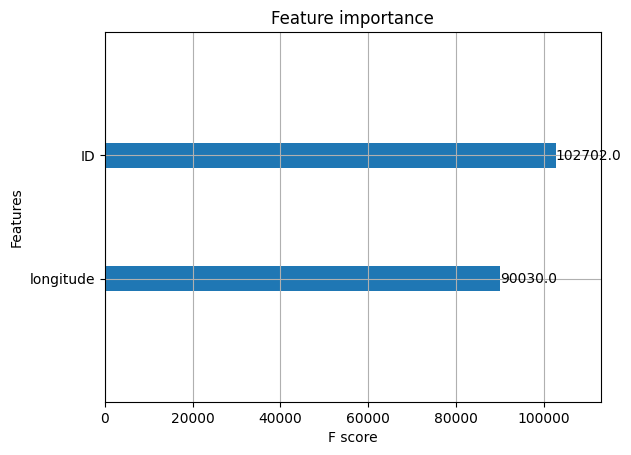

In [ ]:
from xgboost import plot_importance

plot_importance(model, max_num_features=10);

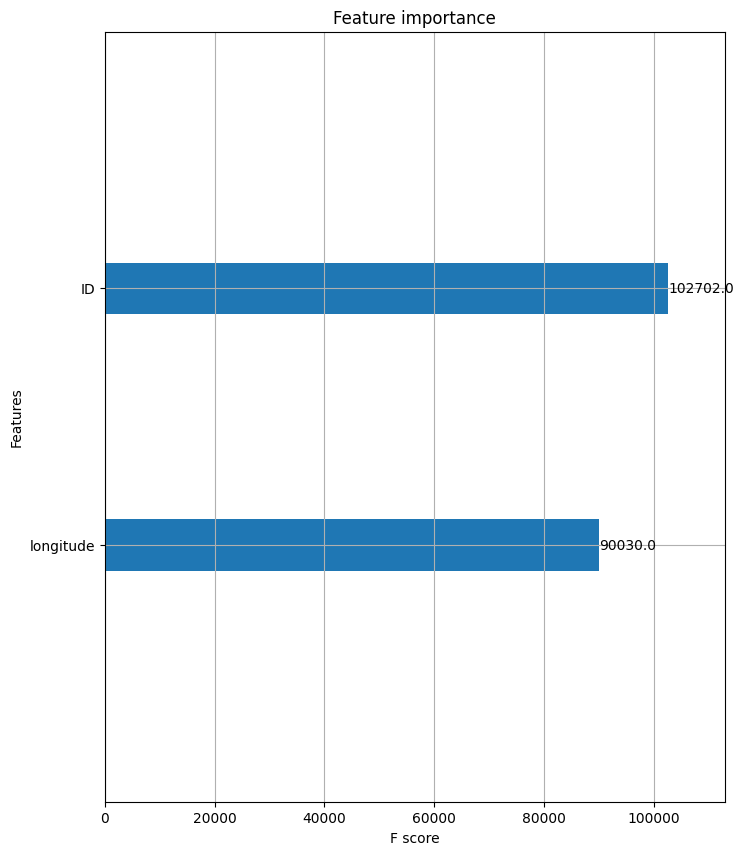

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 10))
plot_importance(model, ax=ax);

In [ ]:
# 기본 lGBMRegressor 모델
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

lgb = LGBMRegressor(random_state=0)
lgb.fit(X_train, y_train)
pred = lgb.predict(X_test)

print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 62548, number of used features: 2
[LightGBM] [Info] Start training from score 238.973630
r2: 0.00546


In [ ]:
#그리드 서치 실행
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

lgb = LGBMRegressor()

parameters = {'colsample_bytree': [0.7, 0.8],
              'learning_rate': [0.1, 0.15, 0.2],
              'max_depth': [11],
              'min_child_weight' : [4],
              'n_estimators': [1000],
              'subsample': [0.3, 0.4]
              }

lgb_grid = GridSearchCV(lgb,
                        parameters,
                        scoring = 'r2',
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)
lgb_grid.fit(X_train, y_train)
print('GridSearchCV 최적 파라미터:', lgb_grid.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001474 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 62548, number of used features: 2
[LightGBM] [Info] Start training from score 238.973630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

In [ ]:
from sklearn.metrics import r2_score

model = lgb_grid.best_estimator_
pred = model.predict(X_test)

print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
r2: 0.00157


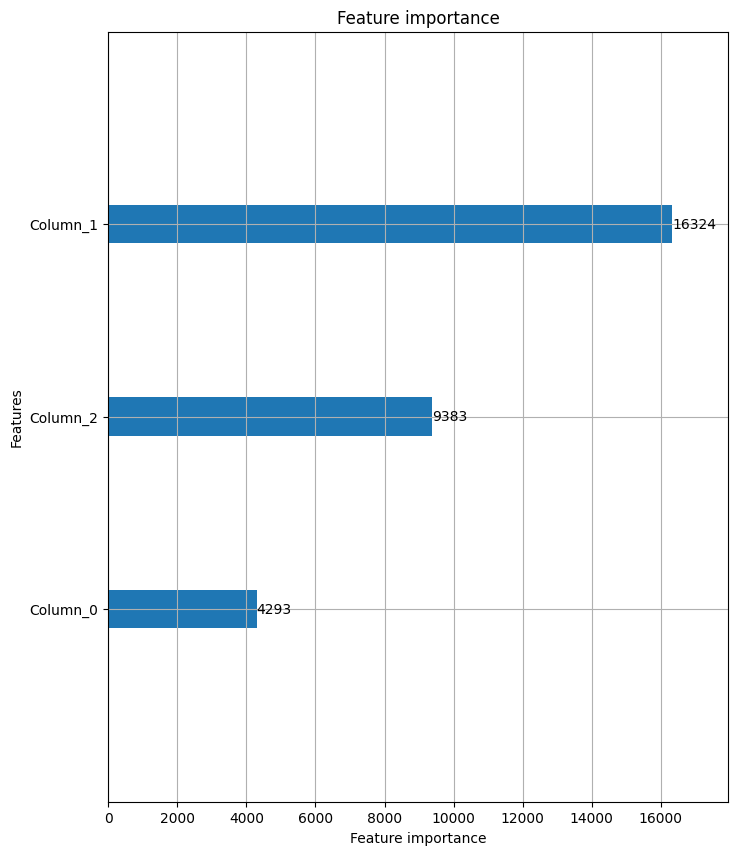

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 10))
plot_importance(model, ax=ax);

In [ ]:
model_xgb = xgb_grid.best_estimator_
pred_xgb = model_xgb.predict(X_test)

model_lgb = lgb_grid.best_estimator_
pred_lgb = model_lgb.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [ ]:
from sklearn.metrics import r2_score

pred = 0.5*pred_xgb + 0.5*pred_lgb
print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.00413


In [ ]:
# 참조 코딩
pred = 0.6*pred_xgb + 0.4*pred_lgb
print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.00411
